<a href="https://colab.research.google.com/github/johnatanDM/Projeto_1_Bootcamp_Data_Science_Alura/blob/main/Notebooks/Bootcamp_Data_Science_Alura_Projeto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Definindo Funções

In [2]:
def baixa_limpa_dados(url):
  # Baixando os dados
  dados = pd.read_csv(url, 
                      delimiter=';', 
                      encoding = "ISO-8859-1",
                      skiprows=3,
                      skipfooter=12,
                      thousands=".",
                      engine='python')

  #Removendo valores vazios
  dados.replace('-',np.nan, inplace=True)
  dados = dados.fillna(method='backfill',axis=1)

  #Usando a coluna 'Unidade da Federação' como index
  dados = dados.set_index('Unidade da Federação', drop=True)

  #Limitando dados apartir de 2009 até 2019
  dados = dados[dados.columns[12:-16]]
  #Criando uma coluna Região
  regioes = {'1': 'Norte', '2': 'Nordeste', '3': 'Sudeste', '4': 'Sul', '5': 'Centro-Oeste'}
  estados = dados.index
  dados["Regiao"] = list(map(lambda estado: regioes[estado[0]] , estados))

  #Corrigindo tipo dos dados numéricos
  dados[dados.columns[:-1]] =  dados[dados.columns[:-1]].astype(int)
  return dados

def meses(dados):
  dados = dados[dados.columns[:-1]]
  return dados

Baixando e limpando os dados de Internações

In [3]:
# Baixando os dados
aih_aprovadas = baixa_limpa_dados("https://github.com/johnatanDM/Projeto_1_Bootcamp_Data_Science_Alura/raw/main/Dados/A163632189_28_143_208.csv")

#Imprimindo os dados
aih_aprovadas.head()

,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,...,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,Regiao
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,6441,7501,7835,7882,8462,8033,7950,7986,7842,8293,8497,8486,8561,8375,8198,8530,8769,8005,8440,8322,8776,8461,8056,7772,8014,7912,8362,8711,8553,8170,8038,8386,9272,8031,8002,7357,7998,7690,8101,8365,...,8558,8661,8615,9061,8523,9484,10086,9317,9505,9569,9388,9106,9936,9674,9783,9446,9930,10315,10290,10537,10158,9965,10379,9494,10422,9498,9444,9708,9623,9899,10939,11252,10380,10646,10202,10244,10013,10283,9711,Norte
12 Acre,4430,4240,4162,4897,4647,4291,4582,4379,4689,4689,3959,4327,4412,3665,4203,4735,4505,4143,3891,3906,4051,3778,4343,4055,4712,4235,4364,4412,4287,4567,4438,4031,4234,4150,4629,4210,3945,3310,4488,4436,...,4180,3681,3715,3512,3800,3573,3428,3591,3000,2953,3877,3939,4622,4439,3487,4608,3254,3341,4252,3339,3977,3958,4000,3709,3988,3778,2591,3284,2902,3799,3037,3658,4213,4403,4033,3889,4255,3632,3484,Norte
13 Amazonas,11080,10236,14524,13037,12922,12847,13973,13386,13963,13205,12736,12435,13558,12834,13209,14215,14016,14184,14108,12235,11712,14062,13575,13663,14113,12905,13818,14037,14822,14257,15450,13604,13385,13303,13085,15085,12944,13190,14065,13643,...,12756,12605,12290,13701,12802,15101,14598,15400,14825,15408,14984,14966,15102,13859,14337,15074,14365,15120,15446,15705,15410,15802,15657,15803,16095,15196,15117,17444,15345,16796,16052,17051,15779,17043,16103,16964,16725,16206,15284,Norte
14 Roraima,2190,1971,2277,2340,2974,2570,2828,3024,3049,2108,2592,2122,2280,2027,2787,2898,2940,2912,2905,2701,2762,2580,2510,1897,1905,1912,2341,2262,1847,2017,2184,2426,2377,2284,2644,3070,2289,2708,3041,3107,...,3732,3802,3193,3173,2989,3510,3829,3878,3915,4189,3969,3549,3655,3489,3513,3717,3776,3567,3461,3504,3661,3661,3739,3471,3901,3696,3591,3274,3086,2871,3172,3033,3591,4324,4881,4366,4288,4019,3767,Norte
15 Pará,40858,40871,44319,43596,43326,42655,47135,46234,46070,45917,42610,43672,43610,43935,45613,43516,46279,44347,43518,43295,44776,43954,43295,42756,44864,43509,44214,43696,40488,43735,40551,40388,43950,42385,41755,41921,42778,41725,43058,42383,...,39568,36353,35945,37874,38784,38240,39490,39638,40400,39264,39984,42506,42518,40717,40967,39487,39306,40553,41899,41519,41406,40710,41713,42521,44184,41147,39475,38268,39379,40493,41863,42449,41512,37799,38526,41093,41973,41094,40501,Norte


Iremos focar primeiramente na Região Nordeste

In [4]:
aiha_nordeste = aih_aprovadas.query("Regiao == 'Nordeste'")
aiha_nord_dados_meses = meses(aiha_nordeste)
aiha_nord_dados_meses

,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,...,2016/Set,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
21 Maranhão,26069,28265,28793,30327,30668,30668,31163,32226,32852,33025,31319,31488,32399,30728,34042,32894,34173,34022,34158,33968,33072,34838,35290,33452,33998,34084,35035,35254,33693,33634,33696,33617,33686,34939,34067,35067,33818,33227,34139,35558,...,35005,33138,31797,27299,31511,35460,37299,35542,37291,37422,39110,37118,37274,36065,36491,38779,39725,36463,39732,41053,40989,39525,39687,39987,38859,39276,38369,37713,39155,36254,39560,40068,40930,38597,39033,38919,38973,39515,38132,36616
22 Piauí,17652,17965,18842,19719,20891,21531,21235,20312,19950,19704,19936,20312,21164,19424,21176,20294,21109,20284,19635,19224,18909,19067,18938,18569,19349,18513,20319,19731,19617,18313,19264,18471,19261,18568,18449,18173,18994,17104,18481,18373,...,18440,17846,17465,17043,17552,16636,17360,17812,18685,17688,17629,17926,18137,17181,16867,17890,17827,17234,18543,18435,18692,18658,18346,18686,18092,18064,17506,18257,17724,17004,17920,17938,18737,18625,18522,18861,18897,19491,18662,18409
23 Ceará,36653,38395,45499,43540,44405,43058,42700,43215,42426,42252,41786,39746,39898,40274,42741,42626,43804,42590,41870,42778,41280,40106,40727,38889,40628,41895,41834,42008,37788,41112,41972,40211,39784,40947,40796,40150,38134,36663,39052,39813,...,40139,39753,38885,37575,37246,37116,40042,38972,41057,39916,40464,40889,39829,40779,39993,38125,40923,38676,42846,43494,43673,42555,43346,43904,41142,43169,41321,39711,44628,42262,43924,44723,46006,44192,44884,45198,44713,44927,42757,43069
24 Rio Grande do Norte,11669,12486,14025,9164,15680,15006,15150,15514,15220,15524,15558,14972,14799,13749,16045,15605,16020,14665,14601,14640,14728,14129,13993,13774,14153,14257,14983,15117,14222,14533,15412,14138,14726,13937,13801,14775,13551,12900,15127,14319,...,11359,13839,12821,13179,12841,12402,14282,14149,14835,13691,14690,14288,13751,13452,13168,12820,13325,13084,14465,15576,15962,14765,15660,15126,14764,14694,14701,12792,14985,14323,15521,15085,16867,15536,16007,16672,15384,15290,15097,14596
25 Paraíba,17881,17768,20160,20264,21557,20352,20600,20603,20459,19875,20688,19840,19835,19109,20678,20186,21368,20276,21391,21088,20192,19840,19508,18843,18159,18714,20056,18768,18307,17741,18809,17983,18108,17766,17628,17356,16259,16512,18442,17749,...,14881,15005,14038,14046,14726,13912,15619,15764,16748,15821,15329,16173,15950,16162,16152,15370,14501,14096,15991,15950,16776,15983,16476,16922,15476,15459,15184,14479,15155,14326,16037,15871,17594,16300,16655,16645,16489,15798,15800,14983
26 Pernambuco,37188,40921,42975,45034,45621,45057,44949,45319,45477,46605,44996,43065,41971,40038,43695,45742,45682,46445,46261,47255,44776,47777,47835,46243,44003,45436,43823,46764,46546,45825,46674,45982,46062,48277,45040,45421,43116,41900,43868,48229,...,46759,44988,42505,42671,42684,42777,46986,46466,50344,48996,49060,49072,47629,47041,45869,45888,44807,42594,48334,48157,50351,48218,48180,49297,46717,48171,46210,43908,46340,44356,47317,49156,51443,49068,50727,50623,48911,50851,49107,46717
27 Alagoas,13941,13716,15962,16572,16674,15847,16010,15102,15912,16269,15269,15274,15666,14108,16212,16419,16150,15246,15939,15509,16336,15691,15615,14864,14596,14640,14457,15949,16581,15780,1

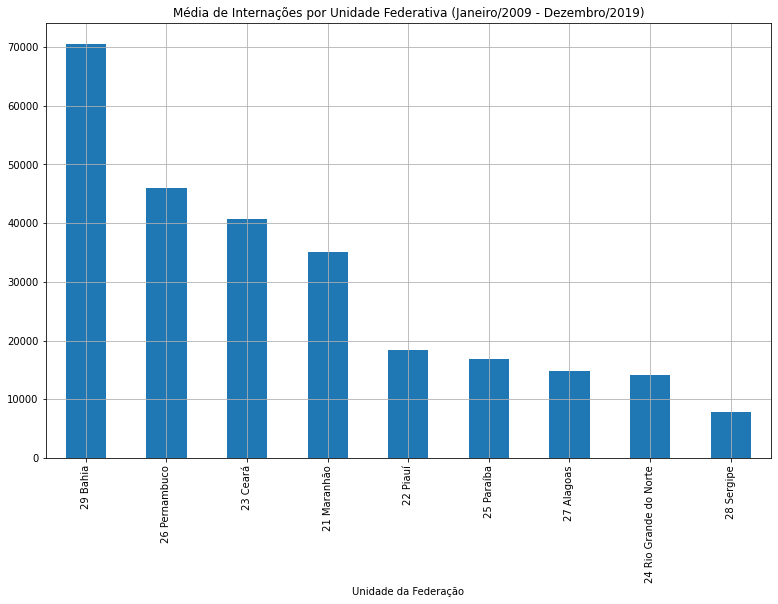

In [21]:
aiha_nord_dados_meses.T.mean().sort_values(ascending=False).plot(kind='bar',figsize=(13,8), grid=True)
plt.title('Média de Internações por Unidade Federativa (Janeiro/2009 - Dezembro/2019)')
plt.show()

Baixando e limpando os dados de **óbitos**

In [6]:
# Baixando os dados
obitos = baixa_limpa_dados("https://github.com/johnatanDM/Projeto_1_Bootcamp_Data_Science_Alura/raw/main/Dados/A231415189_28_143_208.csv")

#Imprimindo os dados
obitos.head()

,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,...,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,Regiao
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,100,93,110,124,98,123,123,115,112,127,148,102,143,102,114,132,180,167,201,197,271,173,159,168,172,142,165,194,183,185,168,250,269,155,150,156,135,216,213,181,...,268,304,273,295,240,351,359,273,323,333,286,301,266,262,235,299,301,289,286,283,281,365,270,252,268,273,283,298,270,265,329,322,255,329,280,312,324,312,227,Norte
12 Acre,136,97,93,107,107,79,100,84,129,129,101,111,107,70,115,141,112,106,85,114,130,137,107,125,149,125,101,145,141,113,156,127,144,110,116,116,107,45,117,134,...,127,90,135,121,98,142,98,131,59,84,132,87,148,153,106,128,85,91,97,95,149,128,117,140,144,185,111,135,107,138,120,146,146,110,144,138,127,105,127,Norte
13 Amazonas,231,155,179,274,267,298,290,318,315,260,267,259,276,208,237,251,258,343,254,280,275,260,283,250,310,342,332,357,335,354,392,267,332,328,341,303,342,337,332,352,...,390,340,394,402,417,517,443,456,421,490,426,451,470,408,403,437,407,492,470,533,536,486,486,462,513,467,496,570,494,627,532,570,457,550,519,596,543,552,490,Norte
14 Roraima,49,37,28,41,39,58,36,63,48,61,52,49,58,52,57,54,66,62,66,57,77,81,72,52,48,31,48,47,34,48,53,50,44,48,59,64,62,75,72,76,...,110,109,77,77,85,87,101,96,129,114,100,109,93,83,87,111,107,78,93,103,132,123,104,126,111,110,102,114,122,52,115,109,124,171,119,139,110,131,122,Norte
15 Pará,677,657,697,701,744,675,781,733,801,739,695,641,809,723,721,721,678,744,791,816,780,771,780,705,832,783,818,727,698,732,633,695,883,814,764,777,813,749,785,840,...,936,928,880,967,942,1022,1065,1002,985,961,937,1005,986,940,859,930,960,1011,996,1083,1010,919,1024,984,976,889,961,972,938,974,990,1016,1083,867,881,1007,925,920,1001,Norte


In [7]:
obitos_nordeste = obitos.query("Regiao == 'Nordeste'")
obitos_meses_nordeste = meses(obitos_nordeste)
obitos_meses_nordeste.head()

,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,...,2016/Set,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
21 Maranhão,297,362,350,359,407,358,332,438,434,364,373,445,407,398,486,443,444,457,483,437,422,429,472,381,465,447,574,515,518,430,436,539,563,485,571,537,570,610,518,680,...,796,826,757,609,832,841,908,945,894,931,930,855,804,805,807,773,947,861,874,979,980,950,885,880,798,777,813,857,1022,836,1025,903,994,1007,911,962,873,917,837,827
22 Piauí,332,334,312,407,350,484,337,370,266,341,323,380,419,386,390,414,379,347,291,300,304,295,379,350,358,343,432,371,431,326,417,389,352,418,454,451,448,398,423,418,...,510,571,552,530,531,459,537,604,569,523,513,516,522,505,457,431,530,507,553,562,578,518,584,463,495,495,513,464,509,522,510,617,598,587,574,567,564,531,496,537
23 Ceará,1052,1204,1370,1200,1410,1167,1349,1200,1264,1178,1213,1105,1159,1257,1224,1278,1269,1172,1183,1229,1157,1155,1160,1165,1147,1223,1346,1171,1102,1179,1301,1113,1137,1201,1233,1141,1269,1126,1272,1174,...,1582,1531,1489,1421,1530,1540,1777,1706,1665,1599,1570,1526,1394,1537,1605,1488,1414,1537,1682,1709,1681,1648,1541,1661,1578,1588,1555,1484,1673,1495,1620,1754,1803,1720,1719,1734,1617,1670,1607,1692
24 Rio Grande do Norte,350,341,304,289,397,366,344,462,452,408,451,411,419,393,407,425,425,402,454,419,444,462,442,403,462,484,520,546,455,435,501,424,514,420,442,498,477,463,454,457,...,480,554,550,497,502,480,564,612,602,508,545,478,500,511,543,515,556,468,527,594,565,534,600,577,519,580,513,465,674,523,630,520,729,571,699,559,612,571,674,530
25 Paraíba,544,565,593,582,675,758,773,701,696,618,692,662,747,648,709,684,623,636,689,710,692,670,699,675,711,575,652,671,645,650,625,651,657,669,569,632,593,579,615,629,...,704,632,621,669,741,669,797,718,708,691,721,736,692,679,797,677,721,647,718,720,701,796,825,785,696,721,720,599,756,671,742,720,873,837,819,843,803,734,763,775


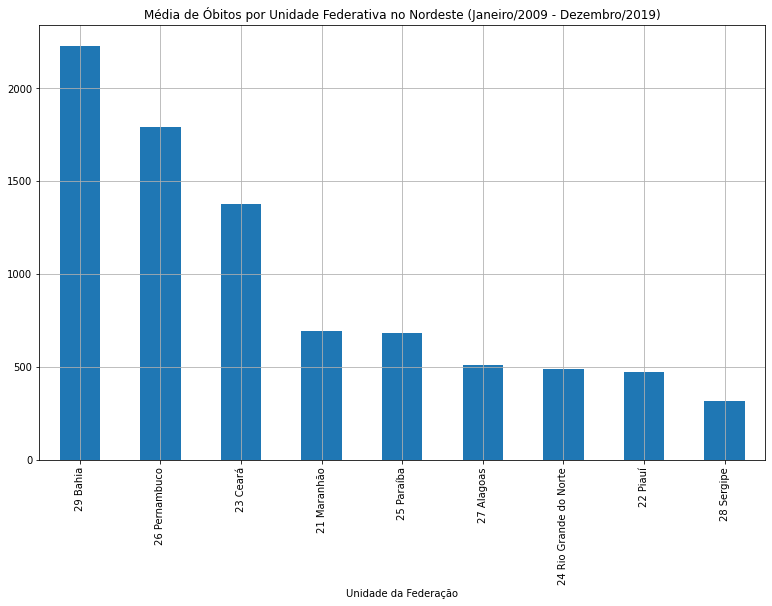

In [22]:
obitos_meses_nordeste.T.mean().sort_values(ascending=False).plot(kind='bar',figsize=(13,8), grid=True)
plt.title('Média de Óbitos por Unidade Federativa no Nordeste (Janeiro/2009 - Dezembro/2019)')
plt.show()

In [10]:
teste = (obitos_meses_nordeste / aiha_nord_dados_meses) * 100
teste

,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,...,2016/Set,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
21 Maranhão,1.139284,1.280736,1.215573,1.183764,1.327116,1.167341,1.065366,1.359151,1.321076,1.102195,1.190970,1.413237,1.256212,1.295236,1.427648,1.346750,1.299271,1.343248,1.414017,1.286505,1.276004,1.231414,1.337489,1.138945,1.367728,1.311466,1.638362,1.460827,1.537411,1.278468,1.293922,1.603355,1.671317,1.388134,1.676109,1.531354,1.685493,1.835856,1.517326,1.912369,...,2.273961,2.492607,2.380728,2.230851,2.640348,2.371686,2.434382,2.658826,2.397361,2.487841,2.377908,2.303465,2.157000,2.232081,2.211504,1.993347,2.383889,2.361298,2.199738,2.384722,2.390885,2.403542,2.229949,2.200715,2.053578,1.978307,2.118898,2.272426,2.610139,2.305952,2.591001,2.253669,2.428537,2.609011,2.333923,2.471800,2.240012,2.320638,2.195007,2.258575
22 Piauí,1.880807,1.859171,1.655875,2.063999,1.675363,2.247922,1.587003,1.821583,1.333333,1.730613,1.620185,1.870815,1.979777,1.987232,1.841708,2.040012,1.795443,1.710708,1.482047,1.560549,1.607700,1.547176,2.001267,1.884862,1.850225,1.852752,2.126089,1.880290,2.197074,1.780156,2.164659,2.106004,1.827527,2.251185,2.460838,2.481704,2.358640,2.326941,2.288837,2.275078,...,2.765727,3.199597,3.160607,3.109781,3.025296,2.759077,3.093318,3.390972,3.045223,2.956807,2.909978,2.878501,2.878095,2.939293,2.709433,2.409167,2.973018,2.941859,2.982257,3.048549,3.092232,2.776289,3.183255,2.477791,2.736016,2.740257,2.930424,2.541491,2.871812,3.069866,2.845982,3.439625,3.191546,3.151678,3.099017,3.006203,2.984601,2.724334,2.657807,2.917051
23 Ceará,2.870161,3.135825,3.011055,2.756086,3.175318,2.710298,3.159251,2.776814,2.979305,2.788034,2.902886,2.780154,2.904908,3.121120,2.863761,2.998170,2.896996,2.751820,2.825412,2.872972,2.802810,2.879868,2.848233,2.995706,2.823176,2.919203,3.217479,2.787564,2.916270,2.867776,3.099686,2.767899,2.857933,2.933060,3.022355,2.841843,3.327739,3.071216,3.257196,2.948786,...,3.941304,3.851282,3.829240,3.781770,4.107824,4.149154,4.437840,4.377502,4.055338,4.005912,3.879992,3.732055,3.499962,3.769097,4.013202,3.902951,3.455270,3.974041,3.925687,3.929278,3.849060,3.872635,3.555115,3.783254,3.835497,3.678566,3.763220,3.737000,3.748768,3.537457,3.688189,3.921919,3.919054,3.892107,3.829873,3.836453,3.616398,3.717141,3.758449,3.928580
24 Rio Grande do Norte,2.999400,2.731059,2.167558,3.153645,2.531888,2.439024,2.270627,2.977955,2.969777,2.628189,2.898830,2.745124,2.831272,2.858390,2.536616,2.723486,2.652934,2.741221,3.109376,2.862022,3.014666,3.269870,3.158722,2.925802,3.264326,3.394824,3.470600,3.611828,3.199269,2.993188,3.250714,2.999010,3.490425,3.013561,3.202666,3.370558,3.520035,3.589147,3.001256,3.191564,...,4.225724,4.003179,4.289837,3.771151,3.909353,3.870343,3.949027,4.325394,4.057971,3.710467,3.710007,3.345465,3.636099,3.798692,4.123633,4.017161,4.172608,3.576888,3.643277,3.813559,3.539657,3.616661,3.831418,3.814624,3.515308,3.947189,3.489559,3.635084,4.497831,3.651470,4.059017,3.447133,4.322049,3.675335,4.366840,3.352927,3.978159,3.734467,4.464463,3.631132
25 Paraíba,3.042335,3.179874,2.941468,2.872088,3.131233,3.724450,3.752427,3.402417,3.401926,3.109434,3.344934,3.336694,3.766070,3.391072,3.428765,3.388487,2.915575,3.136713,3.220981,3.366844,3.427100,3.377016,3.583145,3.5822

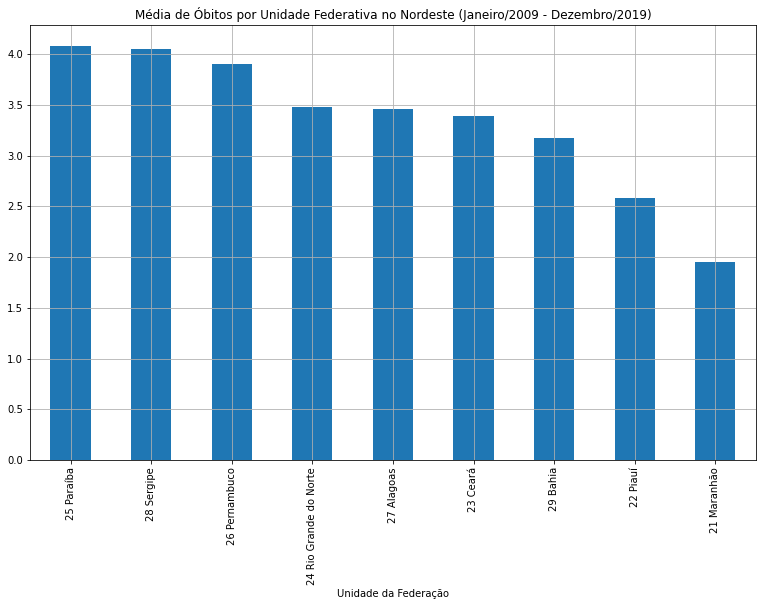

In [23]:
teste.T.mean().sort_values(ascending =False).plot(kind='bar',figsize=(13,8), grid=True)
plt.title('Média de Óbitos por Unidade Federativa no Nordeste (Janeiro/2009 - Dezembro/2019)')
plt.show()